In [82]:
import pandas as pd

path = 'indicadores_saneamento.csv'
data = pd.read_csv(path)
data = data.drop(columns=['grupo', 'subgrupo'])
data.head()

,indicador,ano,valor
0,População,2010,61310.0
1,População,2011,61817.0
2,População,2012,62308.0
3,População,2013,64405.0
4,População,2014,65090.0


In [83]:
import matplotlib.pyplot as plt

# Função para adicionar valores no topo das barras
def autolabel(bars, ax):
    for bar in bars:
        height = bar.get_height()
        height_in_k = height / 1000
        ax.annotate(f'{height_in_k:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Ajuste do texto
                    textcoords='offset points',
                    ha='center', va='bottom')

# 1. Cobertura de abastecimento de água:

- Qual foi a evolução da cobertura de abastecimento de água ao longo dos anos?
- Houve um aumento ou diminuição no acesso à água tratada nos últimos anos?

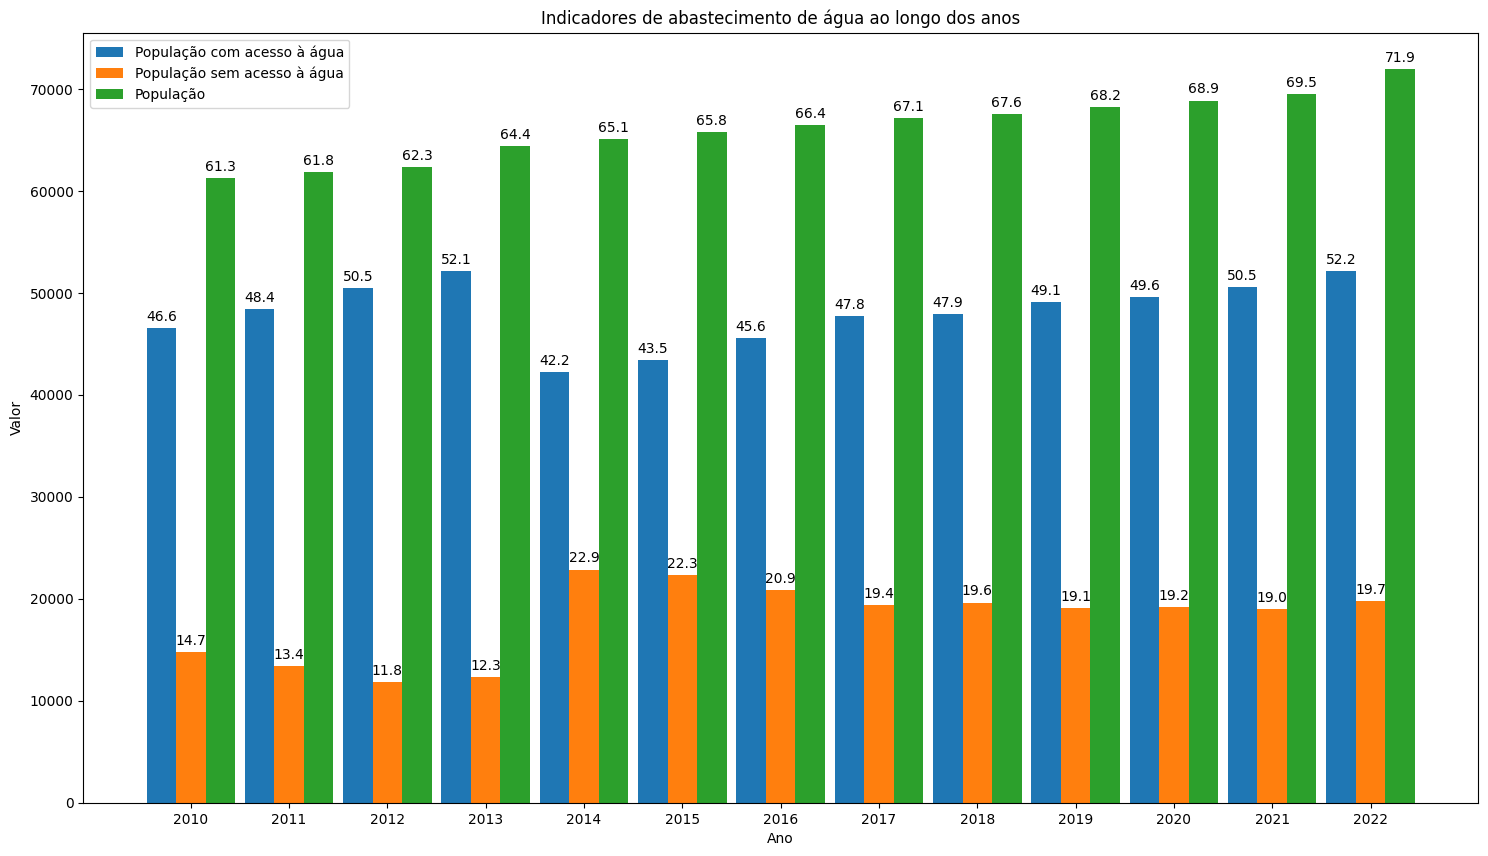

In [84]:
water_access = data[data['indicador'] == 'População com acesso à água']
water_no_access = data[data['indicador'] == 'População sem acesso à água']
population = data[data['indicador'] == 'População']

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
bar_width = 0.3

anos = population['ano']

bar1 = ax.bar(anos - bar_width, water_access['valor'], bar_width, label='População com acesso à água')
bar2 = ax.bar(anos, water_no_access['valor'], bar_width, label='População sem acesso à água')
bar3 = ax.bar(anos + bar_width, population['valor'], bar_width, label='População')

ax.set_xlabel('Ano')
ax.set_ylabel('Valor')
ax.set_xticks(anos)
ax.set_xticklabels(anos)
ax.set_title('Indicadores de abastecimento de água ao longo dos anos')
ax.legend()


autolabel(bar1, ax)
autolabel(bar2, ax)
autolabel(bar3, ax)

plt.show()


# 2. Coleta de esgoto:

- Qual a evolução da coleta de esgoto ao longo dos anos?
- Qual a porcentagem da população atendida pela rede de esgoto em diferentes períodos?

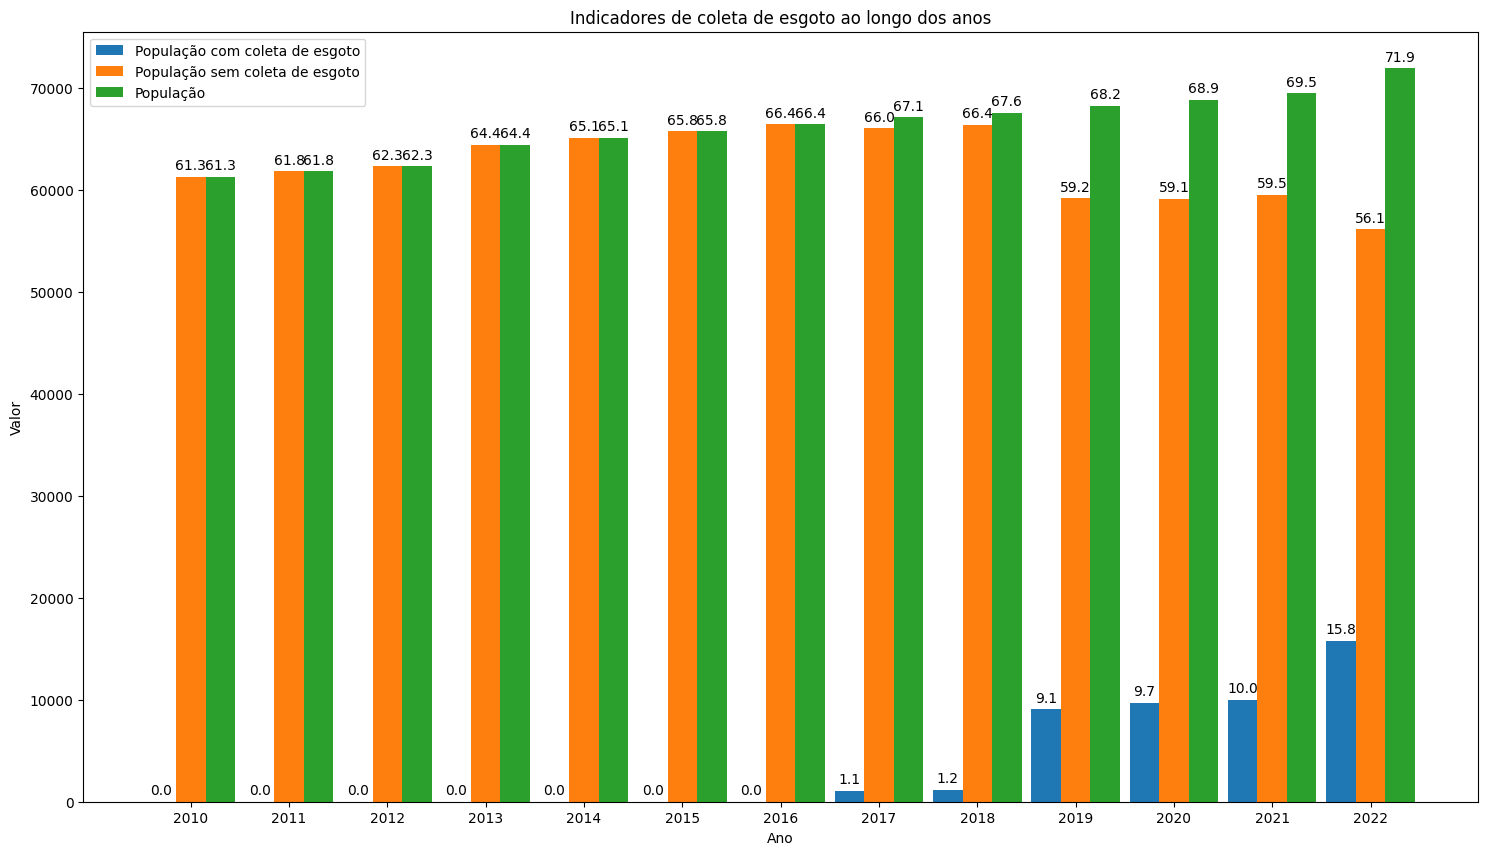

In [85]:
# Indicadores: População com coleta de esgoto, População sem coleta de esgoto, População
sewage_access = data[data['indicador'] == 'População com coleta de esgoto']
sewage_no_access = data[data['indicador'] == 'População sem coleta de esgoto']

fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
bar_width = 0.3

bar1 = ax.bar(anos - bar_width, sewage_access['valor'], bar_width, label='População com coleta de esgoto')
bar2 = ax.bar(anos, sewage_no_access['valor'], bar_width, label='População sem coleta de esgoto')
bar3 = ax.bar(anos + bar_width, population['valor'], bar_width, label='População')

ax.set_xlabel('Ano')
ax.set_ylabel('Valor')

ax.set_xticks(anos)
ax.set_xticklabels(anos)
ax.set_title('Indicadores de coleta de esgoto ao longo dos anos')
ax.legend()

autolabel(bar1, ax)
autolabel(bar2, ax)
autolabel(bar3, ax)

# 3.Tratamento de esgoto:

- Qual a taxa de esgoto tratado em relação ao coletado em cada ano?
- Houve progresso no tratamento de esgoto ao longo dos anos?

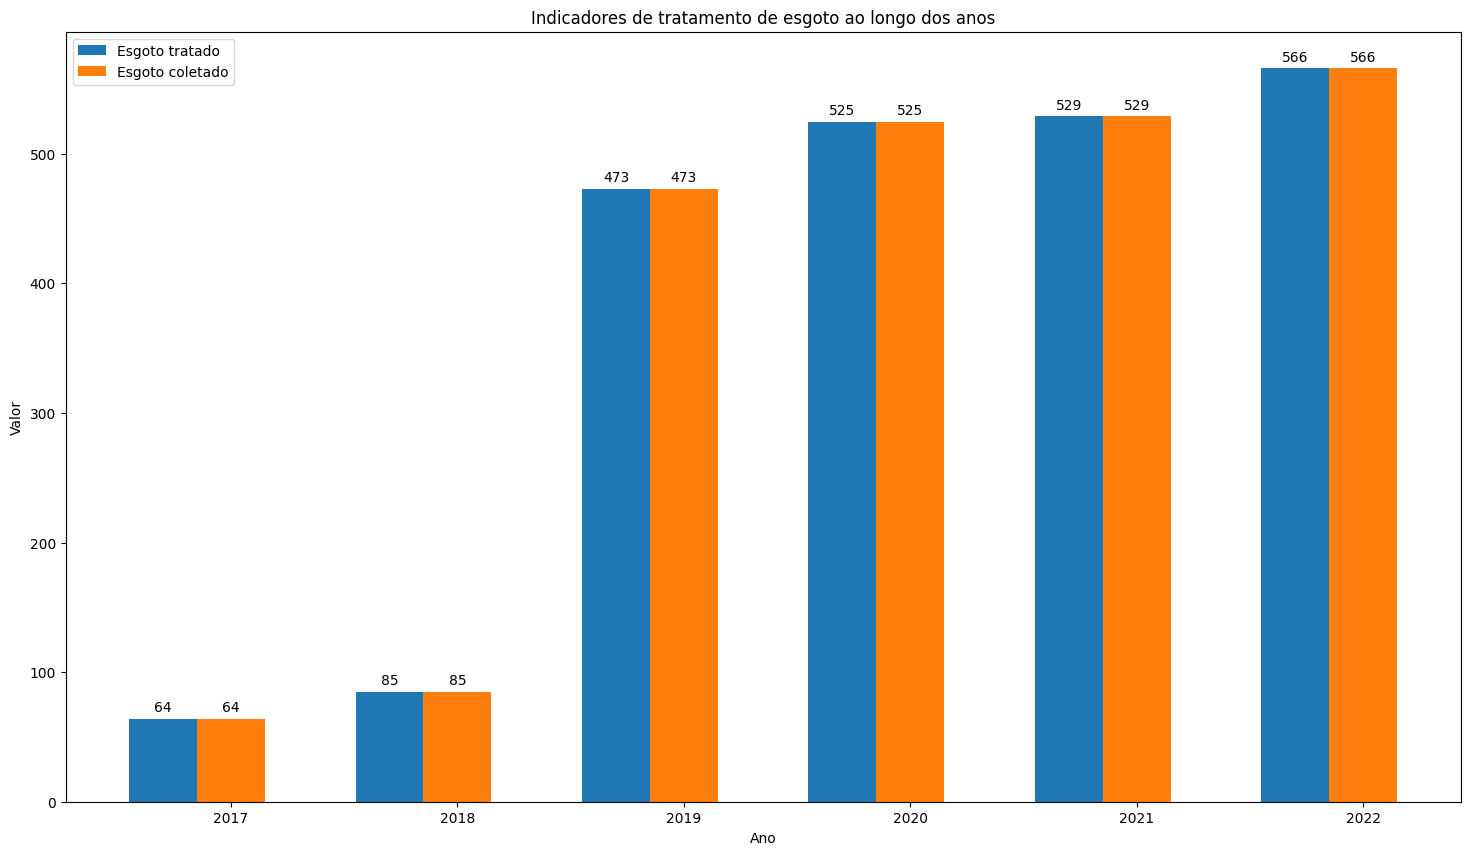

In [86]:
sewage_treated = data[data['indicador'] == 'Esgoto tratado']
sewage_collected = data[data['indicador'] == 'Esgoto coletado']

anos = sewage_treated['ano'].values
anos = anos[sewage_treated['valor'] != 0]

sewage_treated = sewage_treated[sewage_treated['ano'].isin(anos)]
sewage_collected = sewage_collected[sewage_collected['ano'].isin(anos)]



fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
bar_width = 0.3

bar1 = ax.bar(anos - bar_width, sewage_treated['valor'], bar_width, label='Esgoto tratado')
bar2 = ax.bar(anos, sewage_collected['valor'], bar_width, label='Esgoto coletado')

ax.set_xlabel('Ano')
ax.set_ylabel('Valor')

ax.set_xticks(anos)
ax.set_xticklabels(anos)

ax.set_title('Indicadores de tratamento de esgoto ao longo dos anos')
ax.legend()

for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Ajuste do texto
                textcoords='offset points',
                ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Ajuste do texto
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()


# 4. Atraso escolar x Saneamento:

- Qual a relação entre atraso escolar e saneamento básico?
- Como o saneamento básico pode influenciar no atraso escolar?

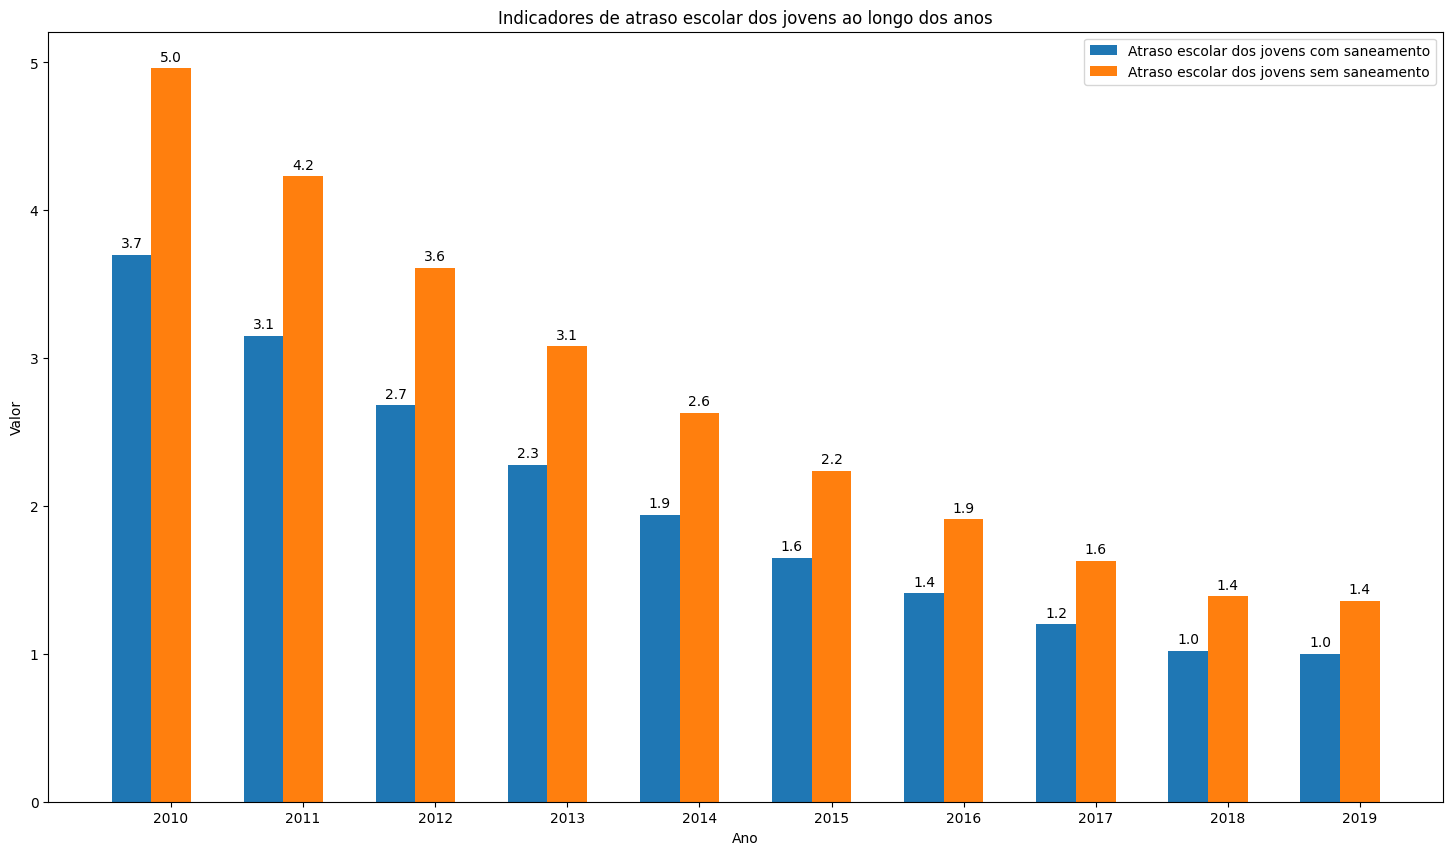

In [88]:
school_delay_with_sanitation = data[data['indicador'] == 'Atraso escolar dos jovens com saneamento']
school_delay_without_sanitation = data[data['indicador'] == 'Atraso escolar dos jovens sem saneamento']

anos = school_delay_with_sanitation['ano'].values
anos = anos[school_delay_with_sanitation['valor'] != 0]

school_delay_with_sanitation = school_delay_with_sanitation[school_delay_with_sanitation['ano'].isin(anos)]
school_delay_without_sanitation = school_delay_without_sanitation[school_delay_without_sanitation['ano'].isin(anos)]

fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
bar_width = 0.3

bar1 = ax.bar(anos - bar_width, school_delay_with_sanitation['valor'], bar_width, label='Atraso escolar dos jovens com saneamento')
bar2 = ax.bar(anos, school_delay_without_sanitation['valor'], bar_width, label='Atraso escolar dos jovens sem saneamento')

ax.set_xlabel('Ano')
ax.set_ylabel('Valor')

ax.set_xticks(anos)
ax.set_xticklabels(anos)

ax.set_title('Indicadores de atraso escolar dos jovens ao longo dos anos')
ax.legend()

for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Ajuste do texto
                textcoords='offset points',
                ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Ajuste do texto
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()
